In [54]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
import pandas as pd
from mlxtend import plotting
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, f1_score,mean_squared_error, r2_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn import metrics
# warnings.filterwarnings('ignore')

%matplotlib inline

In [55]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [4]:
X = df.drop("DEATH_EVENT", axis=1)
y = df['DEATH_EVENT']

In [20]:
X= df[["ejection_fraction","serum_creatinine", 'age','time']]
y = df['DEATH_EVENT']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [3]:
skewed_feats = ['creatinine_phosphokinase', 'platelets','serum_sodium', 'serum_creatinine']

for feat in skewed_feats:
    df['{}_log'.format(feat)] = np.log1p(df[feat].values)

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: name 'X_train' is not defined

In [6]:
y_test

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: DEATH_EVENT, Length: 90, dtype: int64

In [7]:
rf_classifier = RandomForestClassifier(random_state=42, max_depth=6, n_estimators=8, class_weight= "balanced")

In [8]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=8,
                       random_state=42)

In [9]:
rf_classifier.score(X_test, y_test)

0.7444444444444445

In [10]:
y_pred = rf_classifier.predict(X_test)

In [11]:
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Raport klasyfikacyjny: \n", classification_report(y_test, y_pred))

Confusion matrix: [[47  6]
 [17 20]]
Raport klasyfikacyjny: 
               precision    recall  f1-score   support

           0       0.73      0.89      0.80        53
           1       0.77      0.54      0.63        37

    accuracy                           0.74        90
   macro avg       0.75      0.71      0.72        90
weighted avg       0.75      0.74      0.73        90



In [12]:
cross_val_score(rf_classifier, X_train, y_train, cv=3, scoring='recall')

array([0.5       , 0.85      , 0.78947368])

In [13]:
rf_classifier.feature_importances_

array([0.11241835, 0.26444495, 0.11120323, 0.51193347])

In [19]:
# features=df.columns[0:-1]
# plt.figure(figsize = (10,6))
# plt.bar(x=features,height=rf_classifier.feature_importances_)
# plt.xticks(rotation=90,fontsize=12)

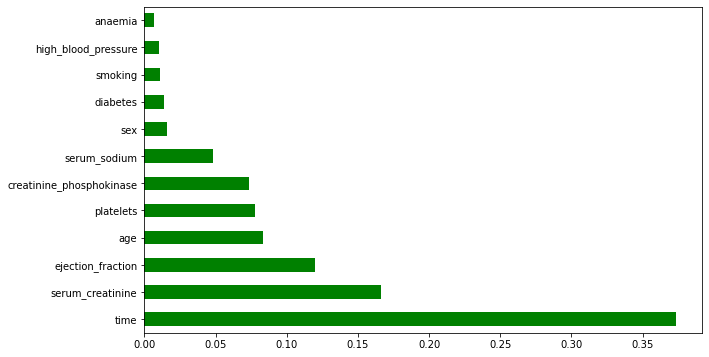

In [12]:
plt.figure(figsize = (10,6))
features=df.columns[0:-1]
feat_importances = pd.Series(rf_classifier.feature_importances_, index=features)
feat_importances.nlargest(12).plot(kind='barh',color='Green')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (98,) and (196,)

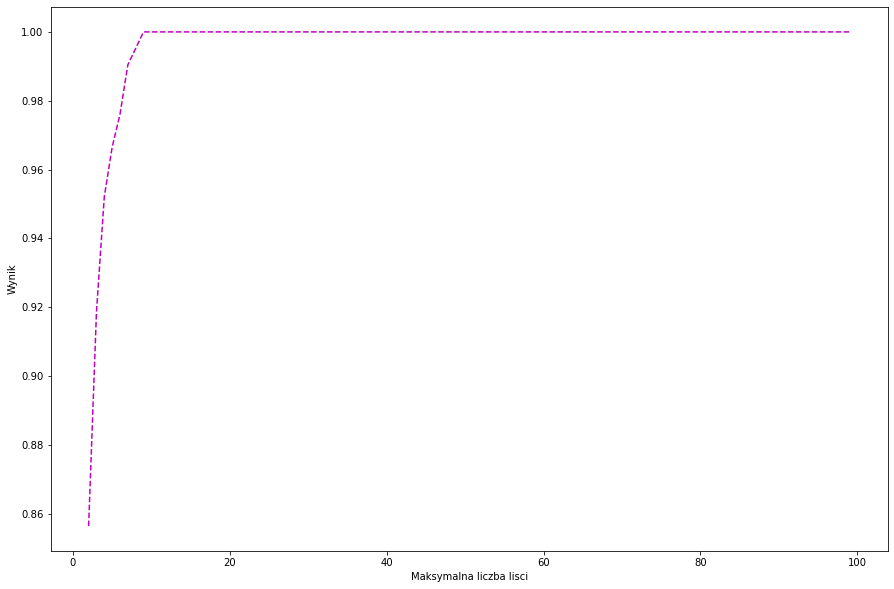

In [40]:
rf_train_scores, brf_test_scores = [], []


for i in range(2, 100, 1):
    
    rf_classifier = RandomForestClassifier(max_depth=i,random_state=42).fit(X_train, y_train)
    rf_train_scores.append(rf_classifier.score(X_train, y_train))
    rf_test_scores.append(rf_classifier.score(X_test, y_test))

    
plt.figure(figsize=(15, 10))
plt.xlabel("Maksymalna liczba lisci")
plt.ylabel("Wynik")

plt.plot(range(2, 100, 1), rf_train_scores, 'm--')
plt.plot(range(2, 100, 1), rf_test_scores, 'm')

In [50]:
# rf_test_scores =  [[], [], [], []]

# estimators_set = [5, 15, 25, 100]

# for node_cnt in range(5, 100, 5):    
#     for idx, tree_cnt in enumerate(estimators_set):
#         rf_classifier = RandomForestClassifier(n_estimators=tree_cnt, max_leaf_nodes=node_cnt).fit(X_train, y_train)
#         rf_test_scores[idx].append(rf_classifier.score(X_test, y_test))


# plt.figure(figsize=(15, 8))

# plt.plot(range(5, 100, 5),  rf_test_scores[idx], label=estimators_set[idx])
# _ =plt.legend()

In [11]:
param_grid = {"max_depth": [1,2,3,4,None],
              "max_features": [0.5,1,'auto'],
              "n_estimators": [10, 100, 200,500,1000],
              "min_samples_leaf": [1,3,5,10,15,20,25]
             }


In [7]:
param_grid = {"max_depth": [3, None],
              "max_features": list(range(1,6)),
              "n_estimators": [10, 50, 100, 200],
              "min_samples_leaf": [1,3,5]}

In [8]:
rf_classifier2 = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_classifier2, param_grid=param_grid, cv=5, verbose=0, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, None],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='recall')

In [9]:
best_param_no = grid_search.best_index_ 
print('Best params set:', grid_search.best_params_, '(no. {0})'.format(best_param_no))
print('Best params score:', grid_search.best_score_)

Best params set: {'max_depth': None, 'max_features': 5, 'min_samples_leaf': 3, 'n_estimators': 10} (no. 112)
Best params score: 0.796969696969697


In [98]:
# ranks = grid_search.cv_results_['rank_test_score']
# score = grid_search.cv_results_['mean_test_score']

# n = 2

# for i in range(n):
#     idx = np.where(ranks == i + 1)[0][0]
#     print(grid_search.cv_results_['params'][idx])
#     print(score[idx])

In [99]:
rf_classifier3 = grid_search.best_estimator_

In [100]:
rf_classifier3

RandomForestClassifier(max_features=8, min_samples_leaf=10, n_estimators=10,
                       random_state=42)

In [101]:
y_pred = rf_classifier3.predict(X_test)

In [15]:
y_score = rf_classifier3.predict_proba(X_test)[:, 1]

In [17]:
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Raport klasyfikacyjny: \n", classification_report(y_test, y_pred))

Confusion matrix: [[47  6]
 [17 20]]
Raport klasyfikacyjny: 
               precision    recall  f1-score   support

           0       0.73      0.89      0.80        53
           1       0.77      0.54      0.63        37

    accuracy                           0.74        90
   macro avg       0.75      0.71      0.72        90
weighted avg       0.75      0.74      0.73        90



In [16]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1_score:", metrics.f1_score(y_test, y_pred))
print("Roc_auc_score:", roc_auc_score(y_test, y_score))

Accuracy: 0.7444444444444445
Precision: 0.7692307692307693
Recall: 0.5405405405405406
F1_score: 0.6349206349206349
Roc_auc_score: 0.8227944926058133


## Wybrane zmienne

In [56]:
# skewed_feats = ['creatinine_phosphokinase', 'platelets','serum_sodium', 'serum_creatinine']

# for feat in skewed_feats:
#     df['{}_log10'.format(feat)] = np.log10(df[feat])

In [116]:
X= df[["ejection_fraction","serum_creatinine", 'time','age']]
y = df['DEATH_EVENT']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [118]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [119]:
# clf2 = RandomForestClassifier(random_state=0)

# cross_val_score(clf2, X, y, cv=10).mean()

In [120]:
param_grid = {'class_weight': ["balanced"],
              "max_depth": list(range(1,6)),
              "max_features": list(range(1,11)),
              "n_estimators": [5, 20, 30, 40, 50, 100, 200]
             }

In [121]:
rf_classifier4 = RandomForestClassifier(random_state=42)

In [122]:
grid_search = GridSearchCV(rf_classifier4, param_grid=param_grid, cv=5, scoring='recall', n_jobs = -1, verbose=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.76515152 0.79848485 0.79848485 0.81515152 0.7969697  0.7969697
 0.81515152 0.6969697  0.6969697  0.7469697  0.7469697  0.73030303
 0.78181818 0.73030303 0.6969697  0.6969697  0.6969697  0.6969697
 0.6969697  0.6969697  0.6969697  0.6969697  0.6969697  0.6969697
 0.6969697  0.6969697  0.6969697  0.6969697         nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.84848485 0.86515152
 0.81515152 0.83181818 0.84848485 0.83181818 0.84848485 0

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [5, 20, 30, 40, 50, 100, 200]},
             scoring='recall', verbose=5)

In [23]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [42]:
# results = pd.DataFrame(grid_search.cv_results_)
# pd.set_option('display.max_columns',None)
# display(results)

In [123]:
best_param_no = grid_search.best_index_ 
print('Best params set:', grid_search.best_params_, '(no. {0})'.format(best_param_no))
print('Best params score:', grid_search.best_score_)

Best params set: {'class_weight': 'balanced', 'max_depth': 2, 'max_features': 1, 'n_estimators': 20} (no. 71)
Best params score: 0.8651515151515152


In [124]:
print("Wynik w zestawie testowym: {:.2f}".format(grid_search.score(X_test,y_test)))

Wynik w zestawie testowym: 0.68


In [125]:
rf_classifier5 = grid_search.best_estimator_

In [126]:
rf_classifier5

RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=1,
                       n_estimators=20, random_state=42)

In [127]:
y_pred = rf_classifier5.predict(X_test)

In [128]:
y_score = rf_classifier5.predict_proba(X_test)[:, 1]

In [129]:
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Raport klasyfikacyjny: \n", classification_report(y_test, y_pred,target_names = ['Heart Not Failed','Heart Failed']))

Confusion matrix: [[47  6]
 [12 25]]
Raport klasyfikacyjny: 
                   precision    recall  f1-score   support

Heart Not Failed       0.80      0.89      0.84        53
    Heart Failed       0.81      0.68      0.74        37

        accuracy                           0.80        90
       macro avg       0.80      0.78      0.79        90
    weighted avg       0.80      0.80      0.80        90



In [130]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1_score:", metrics.f1_score(y_test, y_pred))
print("Roc_auc_score:", roc_auc_score(y_test, y_score))

Accuracy: 0.8
Precision: 0.8064516129032258
Recall: 0.6756756756756757
F1_score: 0.7352941176470588
Roc_auc_score: 0.8694543600203977


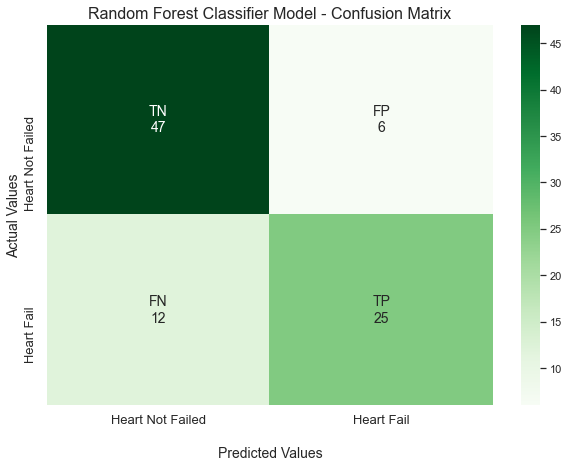

In [131]:
sns.set(rc={"figure.figsize":(10, 7)}) 
cm = confusion_matrix(y_test, y_pred)

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels,  fmt='', cmap='Greens',annot_kws={'size':14})

ax.set_title("Random Forest Classifier Model - Confusion Matrix", fontsize=16);
ax.set_xlabel('\nPredicted Values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14);

ax.xaxis.set_ticklabels(["Heart Not Failed","Heart Fail"],fontsize=13)
ax.yaxis.set_ticklabels(["Heart Not Failed","Heart Fail"],fontsize=13)


plt.show()

In [8]:

from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

sme = SMOTEENN(smote = SMOTE(k_neighbors = 2), random_state=42)
grid_search = GridSearchCV(rf_classifier4, param_grid=param_grid, scoring='recall', n_jobs = -1, verbose=5)

pipeline = Pipeline([('scale', StandardScaler()),
                     ('SMOTEENN', sme),
                     ('grid', grid_search)])

cv = StratifiedKFold(n_splits = 4)
score = cross_val_score(pipeline, X, y, cv=cv)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.82       0.85966667 0.918      0.902      0.943      0.769
 0.87633333 0.88466667 0.893      0.909      0.769      0.78566667
 0.78566667 0.78566667 0.78566667 0.769      0.769      0.769
 0.769      0.769             nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.74433333 0.76133333 0.96766667 0.97566667
 0.98333333 0.94233333 0.934      0.97566667 0.97566667 0.98366667
 0.90966667 0.934      0.92566667 0.909      0.91733333 0.91733333
 0.92566667 0.909      0.909      0.909             nan        nan
        nan        nan        nan        nan        nan        n

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.90380952 0.8647619  0.96095238 0.96095238 0.98095238 0.97047619
 0.89333333 0.92190476 0.92190476 0.92190476 0.95047619 0.92190476
 0.97047619 0.97047619 0.97047619 0.96095238 0.96095238 0.96095238
 0.96095238 0.96095238        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.94190476 0.91333333 0.95190476 0.95190476
 0.97095238 0.95142857 0.92190476 0.95142857 0.95142857 0.95142857
 0.93190476 0.92238095 0.94190476 0.93238095 0.95142857 0.8847619
 0.91333333 0.95142857 0.93238095 0.93238095        nan        nan
        nan        nan        nan        nan        nan

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.70566667 0.91733333 0.91733333 0.901      0.90933333 0.771
 0.755      0.77166667 0.77966667 0.78766667 0.73766667 0.67266667
 0.65666667 0.65666667 0.65666667 0.65666667 0.65666667 0.65666667
 0.65666667 0.65666667        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.788      0.84433333 0.92566667 0.94266667
 0.95066667 0.81266667 0.91       0.869      0.87733333 0.87733333
 0.77933333 0.79633333 0.82133333 0.82933333 0.82933333 0.77966667
 0.77933333 0.829      0.821      0.821             nan        nan
        nan        nan        nan        nan        nan    

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.83833992 0.93794466 0.96363636 0.96363636 0.96363636 0.94545455
 0.94545455 0.95454545 0.95454545 0.95454545 0.94545455 0.94545455
 0.95454545 0.95454545 0.95454545 0.94545455 0.95454545 0.95454545
 0.95454545 0.95454545        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.87549407 0.90197628 0.98181818 0.98181818
 0.98181818 0.96363636 0.96363636 0.96363636 0.96363636 0.96363636
 0.96363636 0.96363636 0.96363636 0.96363636 0.96363636 0.95454545
 0.95454545 0.94545455 0.95454545 0.95454545        nan        nan
        nan        nan        nan        nan        na

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.74545455 0.78030303 0.81363636 0.81363636 0.81363636 0.6969697
 0.74848485 0.7469697  0.7469697  0.78181818 0.74848485 0.6969697
 0.6969697  0.6969697  0.6969697  0.6969697  0.6969697  0.6969697
 0.6969697  0.6969697         nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.71212121 0.72878788 0.84848485 0.86515152
 0.86515152 0.73181818 0.78181818 0.79848485 0.83181818 0.83181818
 0.78181818 0.78181818 0.84848485 0.84848485 0.84848485 0.84848485
 0.83181818 0.84848485 0.84848485 0.84848485        nan        nan
        nan        nan        nan        nan        nan  

GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [5, 10, 50, 100, 200]},
             scoring='recall', verbose=5)

In [13]:
best_param_no = grid_search.best_index_ 
print('Best params set:', grid_search.best_params_, '(no. {0})'.format(best_param_no))
print('Best params score:', grid_search.best_score_)

Best params set: {'class_weight': 'balanced', 'max_depth': 2, 'max_features': 1, 'n_estimators': 100} (no. 53)
Best params score: 0.8651515151515152


In [14]:
rf_classifier5 = grid_search.best_estimator_

In [15]:
y_pred = rf_classifier5.predict(X_test)

In [16]:
y_score = rf_classifier5.predict_proba(X_test)[:, 1]

In [20]:
print("Wynik w zestawie testowym: {:.2f}".format(grid_search.score(X_test,y_test)))

Wynik w zestawie testowym: 0.65


In [17]:
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Raport klasyfikacyjny: \n", classification_report(y_test, y_pred,target_names = ['Heart Not Failed','Heart Failed']))

Confusion matrix: [[45  8]
 [13 24]]
Raport klasyfikacyjny: 
                   precision    recall  f1-score   support

Heart Not Failed       0.78      0.85      0.81        53
    Heart Failed       0.75      0.65      0.70        37

        accuracy                           0.77        90
       macro avg       0.76      0.75      0.75        90
    weighted avg       0.77      0.77      0.76        90



In [18]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1_score:", metrics.f1_score(y_test, y_pred))
print("Roc_auc_score:", roc_auc_score(y_test, y_score))

Accuracy: 0.7666666666666667
Precision: 0.75
Recall: 0.6486486486486487
F1_score: 0.6956521739130435
Roc_auc_score: 0.8516063233044365


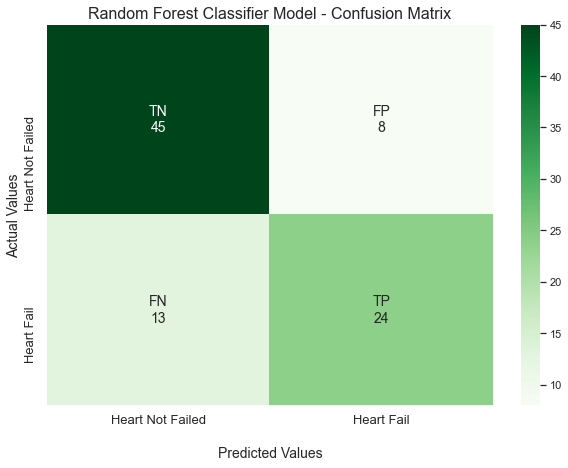

In [19]:
sns.set(rc={"figure.figsize":(10, 7)}) 
cm = confusion_matrix(y_test, y_pred)

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels,  fmt='', cmap='Greens',annot_kws={'size':14})

ax.set_title("Random Forest Classifier Model - Confusion Matrix", fontsize=16);
ax.set_xlabel('\nPredicted Values',fontsize=14)
ax.set_ylabel('Actual Values',fontsize=14);

ax.xaxis.set_ticklabels(["Heart Not Failed","Heart Fail"],fontsize=13)
ax.yaxis.set_ticklabels(["Heart Not Failed","Heart Fail"],fontsize=13)


plt.show()